In [40]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np

In [41]:
client_id=''
client_secret=''
redirect_uri='http://google.com/'

In [42]:
username='n.acar'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret) 
scope = 'user-library-read playlist-read-private'
try:
    token = util.prompt_for_user_token(username, scope,client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)  
    sp=spotipy.Spotify(auth= token)
except:
    print('Token is not accesible for ' + username)

In [43]:
def getTrivialInfo(playlistList):
    dfTrivialList=[]
    for playlist in playlistList:
        index=0
        dfTrivial = pd.DataFrame(columns=('SongName', 'SongId', 'SongArtist'), index=np.arange(0, len(playlist['tracks']['items'])))
        for item in playlist['tracks']['items']:
            track = item['track']
            dfTrivial.loc[index]=[track['name'], track['id'], track['artists'][0]['name']]
            index+=1
        dfTrivialList.append(dfTrivial)
    return dfTrivialList

In [44]:
def getSongList(dfTrivialList):
    songIdsList=[]
    for dfTrivial in dfTrivialList:
        songIds=list(dfTrivial['SongId'])
        songIdsList.append(songIds)
    return songIdsList

In [45]:
def getFeaturesList(dfTrivialList, songIdsList, columns=('SongName', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Valence', 'Instrumentalness','Tempo')):
    dfFeaturesList=[]
    for dfTrivial, songIds in zip(dfTrivialList, songIdsList):
        index=0
        audioFeatures = sp.audio_features(tracks=songIds)
        categories=columns[1:]
        dfFeatures = pd.DataFrame(columns=columns, index=np.arange(0, len(songIds)))
        for i, song in enumerate(audioFeatures):
            dfFeatures.loc[index]=[list(dfTrivial['SongName'])[i], song['danceability'], song['energy'], song['loudness'], song['speechiness'], song['acousticness'], song['valence'], song['instrumentalness'], song['tempo']]
            index+=1
        dfFeaturesList.append(dfFeatures)
    return dfFeaturesList

In [46]:
def getFeaturesToUse(dfFeaturesList, categories=['Danceability','Energy', 'Speechiness', 'Acousticness', 'Valence']):
    featuresToUseList=[]
    for dfFeatures in dfFeaturesList:
        features = dfFeatures[categories]
        featuresToUseList.append(features)
    return featuresToUseList

In [47]:
def featurePreprocessing(song, categories=['Danceability','Energy', 'Speechiness', 'Acousticness', 'Valence']):
    return song[categories]

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import operator

In [49]:
playlistDictionary={"Get Turnt": "37i9dQZF1DWY4xHQp97fN6",
                   "Classical Essentials": "37i9dQZF1DWWEJlAGA9gs0", #37i9dQZF1DXaXB8fQg7xif
                    "Rock Save the Queen" : "37i9dQZF1DXcDnIr0iKAG8",
                   "Coffee Table Jazz" : "37i9dQZF1DWVqfgj8NZEp1"
                   }

In [50]:
getTurntId=playlistDictionary["Get Turnt"]
dancePartyId=playlistDictionary["Classical Essentials"]
jazzyRomanceId=playlistDictionary["Coffee Table Jazz"]
rockSaveTheQueenId=playlistDictionary["Rock Save the Queen"]
spotifyUsername='Spotify'
getTurnt=sp.user_playlist(spotifyUsername, playlist_id=getTurntId)
danceParty=sp.user_playlist(spotifyUsername, playlist_id=dancePartyId)
jazzyRomance=sp.user_playlist(spotifyUsername, playlist_id=jazzyRomanceId)
rockSaveTheQueen=sp.user_playlist(spotifyUsername, playlist_id=rockSaveTheQueenId)

/Users/nev/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/nev/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/nev/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/nev/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/nev/anaconda3/lib/python3.6/site-pack

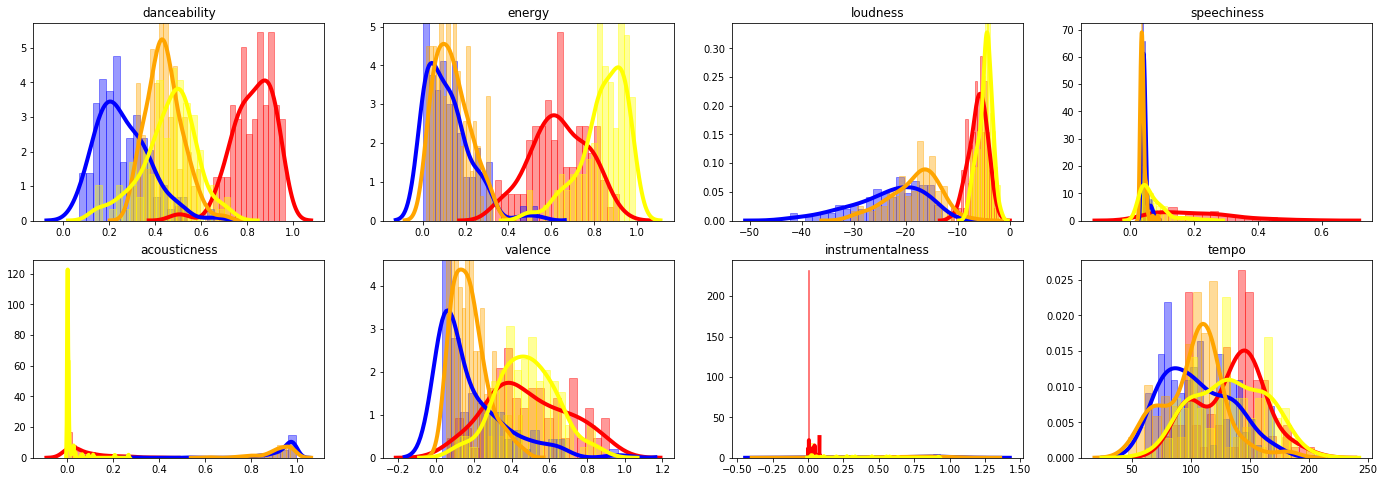

In [51]:
column=('songName', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'valence', 'instrumentalness','tempo')
playlistList=[getTurnt, danceParty, jazzyRomance, rockSaveTheQueen]
n_bins=20
fig, axs = plt.subplots(figsize=(24, 8), nrows=2, ncols=4)
axs=axs.flatten()
dfTrivialList=getTrivialInfo(playlistList)
songIdsList=getSongList(dfTrivialList)
songIds1=songIdsList[0]
songIds2=songIdsList[1]
songIds3=songIdsList[2]
songIds4=songIdsList[3]
audioFeatures1 = sp.audio_features(tracks=songIds1)
audioFeatures2 = sp.audio_features(tracks=songIds2)
audioFeatures3 = sp.audio_features(tracks=songIds3)
audioFeatures4 = sp.audio_features(tracks=songIds4)
for song1, song2, song3, song4 in zip(audioFeatures1, audioFeatures2, audioFeatures3, audioFeatures4):
    if song1 is None:
        audioFeatures1.remove(song1)
    if song2 is None:
        audioFeatures2.remove(song2)
    if song3 is None:
        audioFeatures3.remove(song3)
    if song4 is None:
        audioFeatures4.remove(song4)
            
index=0
for feature in column[1:]:
    ax=axs[index]
    ax.set_title(feature)
    featureListToPlot1 = []
    featureListToPlot2 = []
    featureListToPlot3 = []
    featureListToPlot4 = []
    for song1, song2, song3, song4 in zip(audioFeatures1, audioFeatures2, audioFeatures3, audioFeatures4):
        featureListToPlot1.append(song1[feature])
        featureListToPlot2.append(song2[feature])
        featureListToPlot3.append(song3[feature])
        featureListToPlot4.append(song4[feature])
    sns.distplot(featureListToPlot1, hist=True, bins=n_bins, color = 'red', hist_kws={'edgecolor':'red'}, kde_kws={'linewidth': 4}, ax=ax)
    sns.distplot(featureListToPlot2, hist=True, bins=n_bins, color = 'blue', hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4}, ax=ax)
    sns.distplot(featureListToPlot3, hist=True, bins=n_bins, color = 'orange', hist_kws={'edgecolor':'orange'}, kde_kws={'linewidth': 4}, ax=ax)
    sns.distplot(featureListToPlot4, hist=True, bins=n_bins, color = 'yellow', hist_kws={'edgecolor':'yellow'}, kde_kws={'linewidth': 4}, ax=ax)
    index+=1


In [52]:
categories = column[1:]
tempoFeaturesTogether=[]
loudnessFeaturesTogether=[]

for song1, song2, song3, song4 in zip(audioFeatures1, audioFeatures2, audioFeatures3, audioFeatures4):
    tempoFeaturesTogether.append(song1['tempo'])
    tempoFeaturesTogether.append(song2['tempo'])
    tempoFeaturesTogether.append(song3['tempo'])
    tempoFeaturesTogether.append(song4['tempo'])
    loudnessFeaturesTogether.append(song1['loudness'])
    loudnessFeaturesTogether.append(song2['loudness'])
    loudnessFeaturesTogether.append(song3['loudness'])
    loudnessFeaturesTogether.append(song4['loudness'])
    
minimumTempo=min(tempoFeaturesTogether)
maximumTempo=max(tempoFeaturesTogether)
minimumLoudness=min(loudnessFeaturesTogether)
print(minimumLoudness)
maximumLoudness=max(loudnessFeaturesTogether)
print(maximumLoudness)

for song1, song2, song3, song4 in zip(audioFeatures1, audioFeatures2, audioFeatures3, audioFeatures4):
    song1['tempo']=(song1['tempo']-minimumTempo)/(maximumTempo-minimumTempo)
    song2['tempo']=(song2['tempo']-minimumTempo)/(maximumTempo-minimumTempo)
    song3['tempo']=(song3['tempo']-minimumTempo)/(maximumTempo-minimumTempo)
    song4['tempo']=(song4['tempo']-minimumTempo)/(maximumTempo-minimumTempo)
    song1['loudness']=(song1['loudness']-minimumLoudness)/(maximumLoudness-minimumLoudness)
    song2['loudness']=(song2['loudness']-minimumLoudness)/(maximumLoudness-minimumLoudness)
    song3['loudness']=(song3['loudness']-minimumLoudness)/(maximumLoudness-minimumLoudness)
    song4['loudness']=(song4['loudness']-minimumLoudness)/(maximumLoudness-minimumLoudness)




dfFeaturesList=[]
audioFeaturesList=[audioFeatures1, audioFeatures2, audioFeatures3, audioFeatures4]
for audioFeatures in audioFeaturesList:
    dfFeatures = pd.DataFrame(columns=categories, index=np.arange(0, len(audioFeatures)))
    for i, song in enumerate(audioFeatures[:99]):
        print(song['loudness'])
        dfFeatures.loc[i]=[song['danceability'], song['energy'], song['loudness'], song['speechiness'], song['acousticness'], song['valence'], song['instrumentalness'], song['tempo']]
    
    dfFeaturesList.append(dfFeatures)

for i in range(len(dfFeaturesList)):
    dfFeaturesList[i]=dfFeaturesList[i].mean()

dfFeaturesList=pd.concat(dfFeaturesList, axis=1)

-42.32
-1.884
0.8856464536551587
0.8780047482441389
0.8891829063211
0.9315214165595015
0.9418834701750914
0.8636116331981403
0.8463003264417847
0.9058264912454249
0.9633000296765258
0.9771985359580573
0.9193787713918291
0.8567118409338215
0.9098822831140568
0.8625482243545356
0.9258581462063509
0.8516421010980314
0.9331041646057968
0.8247353843110101
0.9148531011969533
0.8840884360470869
0.76800375902661
0.8896527846473441
0.8400187951330498
0.84545949154219
0.9475220100900188
0.874418834701751
0.9547432980512415
0.9039717083786724
0.8418241171233554
0.8980364032050648
0.8891829063211
0.9518251063408844
0.9130972400830942
0.9287268770402612
0.8449896132159461
0.8532001187061035
0.9227173805519834
0.9372094173508754
0.902240577703037
0.929122564051835
0.909956474428727
0.8895291324562271
0.8751112869720052
0.9463102186170739
0.8412305866059946
0.8898506281531309
0.8601493718468691
0.9460876446730636
0.9334503907409238
0.820877435948165
0.9668364823424671
0.8974181422494806
0.93241171233

[0.82579797979798, 0.6344343434343432, 0.8958059175192421, 0.20127171717171713, 0.07879343434343435, 0.4844070707070704, 0.0018643217171717176, 0.549665221041201]
[0.25674343434343433, 0.11151686868686866, 0.4685711102517906, 0.04473737373737373, 0.934929292929293, 0.17264545454545457, 0.6127811577777781, 0.37287901555404107]
[0.440737373737374, 0.1373646464646465, 0.5944827641335703, 0.03912121212121212, 0.9114949494949495, 0.17476565656565654, 0.6099913131313133, 0.35751205988430745]
[0.45986868686868687, 0.8428686868686868, 0.9282829781642722, 0.07047777777777778, 0.01215270787878788, 0.47880202020201995, 0.0537633592929293, 0.5485882432352673]


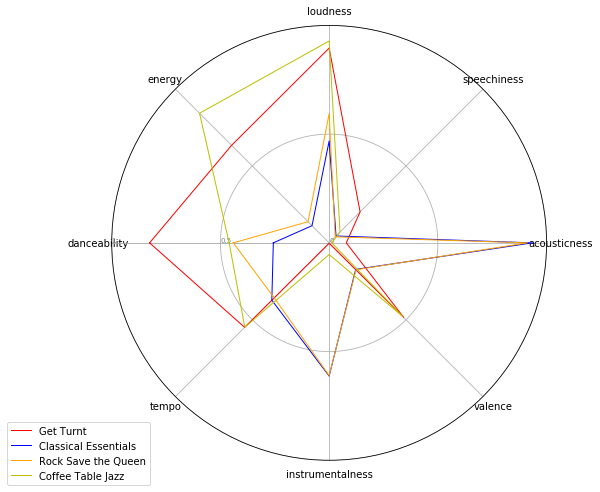

In [53]:
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi)
ax.set_theta_direction(-1)
 
plt.xticks(angles, categories)

ax.set_rlabel_position(0)
plt.yticks([0, 0.5, 1], ["0", "0.5", "1"], color="grey", size=7)
plt.ylim(0, 1)
 

# Ind1
colors=['r', 'b', 'orange', 'y']
for i, key in enumerate(playlistDictionary.keys()):
    if i <4:
        values=list(dfFeaturesList[i])
        print(values)
        values += values[:1]
        ax.plot(angles, values, color=colors[i], linewidth=1, linestyle='solid', label=key)
 
# Add legend
plt.legend(bbox_to_anchor=(0.1, 0.1))

In [54]:
def euclideanDistance(data1, data2, weight, length):
    distance = 0
    for x in range(length):
        distance += np.square(weight[x]*(data1[x] - data2[x]))
    return np.sqrt(distance)

def distances(trainingSet, testSong, weight):
    distanceDict = {}
    length = testSong.shape[0]
    for genre, features in trainingSet.items():
        dist = [[euclideanDistance(features.iloc[x], testSong, weight, length), x] for x in range(len(features))]
        distanceDict[genre] = dist
    return distanceDict

In [55]:
def knn(sortedDistances, k):
    counter={}
    for key in sortedDistances.keys():
        counter[key] =0 
    minKey=''
    minId=0
    neighborKeyAndId=[]
    for i in range(k):
        minValue=5
        for key, value in sortedDistances.items():
            if value[0][0]<minValue:
                minId=value[0][1]
                minKey=key
                minValue = value[0][0]
        del(sortedDistances[minKey][0])
        counter[minKey]=counter[minKey]+1
        neighborKeyAndId.append([minKey, minId])
    return counter, neighborKeyAndId

In [56]:
playlistList=[getTurnt, danceParty, rockSaveTheQueen, jazzyRomance]

In [57]:
dfTrivialList=getTrivialInfo(playlistList);
songIdsList=getSongList(dfTrivialList);
dfFeaturesList=getFeaturesList(dfTrivialList, songIdsList, columns=('SongName', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Valence', 'Instrumentalness','Tempo'))
print(dfFeaturesList[1].iloc[48])
featuresToUseList=getFeaturesToUse(dfFeaturesList, categories=['Danceability','Energy', 'Speechiness', 'Acousticness', 'Valence','Instrumentalness'])
print(featuresToUseList[1])

SongName            Violin Concerto BWV 1042 in E Major: Violin Co...
Danceability                                                    0.441
Energy                                                          0.319
Loudness                                                       -13.99
Speechiness                                                    0.0392
Acousticness                                                    0.829
Valence                                                         0.671
Instrumentalness                                                    0
Tempo                                                          99.419
Name: 48, dtype: object
   Danceability   Energy Speechiness Acousticness Valence Instrumentalness
0         0.242  0.00898      0.0424        0.994  0.0549            0.909
1         0.194   0.0324      0.0382        0.982  0.0596            0.961
2         0.275    0.157      0.0636         0.89   0.304            0.842
3         0.398  0.00293      0.0666        0.

In [58]:
f1= featuresToUseList[0][:35]
f2= featuresToUseList[1][:35]
f3= featuresToUseList[2][:35]
f4= featuresToUseList[3][:35]
trainingSet = {'1': f1, '2': f2, '3': f3, '4': f4}
for i in range(len(featuresToUseList)):
    print(i)
    accurate=0
    total=0
    for j in range(35,99):
        distanceList=distances(trainingSet, featuresToUseList[i].iloc[j], [1,1,1,1,1,1])
        print(dfFeaturesList[i].iloc[j])
        sortedDict={}
        for key in distanceList.keys():
            sortedDict[key]=sorted(distanceList[key], key=operator.itemgetter(0))
        counter, neighborKeyAndId = knn(sortedDict, 25)
        prediction=max(counter.items(), key=operator.itemgetter(1))[0]
        if(i+1 == int(prediction)):
            accurate+=1
        total+=1
        print(counter)
    print(float(accurate/total))

0
SongName            Live Sheck Wes
Danceability                 0.781
Energy                       0.617
Loudness                     -7.82
Speechiness                  0.252
Acousticness              0.000732
Valence                      0.506
Instrumentalness            0.0467
Tempo                      139.973
Name: 35, dtype: object
{'1': 23, '2': 0, '3': 2, '4': 0}
SongName                a&t
Danceability          0.924
Energy                0.567
Loudness             -5.009
Speechiness          0.0964
Acousticness        0.00169
Valence               0.827
Instrumentalness          0
Tempo               146.975
Name: 36, dtype: object
{'1': 21, '2': 0, '3': 4, '4': 0}
SongName                 EA
Danceability          0.527
Energy                0.902
Loudness             -4.423
Speechiness           0.443
Acousticness          0.108
Valence               0.658
Instrumentalness          0
Tempo               179.928
Name: 37, dtype: object
{'1': 5, '2': 0, '3': 20, '4': 0}
SongN

SongName            Chanel (Go Get It) [feat. Gunna & Lil Baby]
Danceability                                              0.938
Energy                                                      0.5
Loudness                                                 -10.08
Speechiness                                               0.144
Acousticness                                            0.00183
Valence                                                   0.462
Instrumentalness                                              0
Tempo                                                   140.011
Name: 57, dtype: object
{'1': 23, '2': 0, '3': 2, '4': 0}
SongName            Die Young
Danceability            0.688
Energy                  0.656
Loudness               -5.541
Speechiness             0.276
Acousticness            0.218
Valence                 0.365
Instrumentalness            0
Tempo                 160.414
Name: 58, dtype: object
{'1': 22, '2': 0, '3': 3, '4': 0}
SongName            LOSE IT (feat. Lil

Name: 76, dtype: object
{'1': 19, '2': 0, '3': 6, '4': 0}
SongName            Drop Top Benz
Danceability                0.841
Energy                       0.63
Loudness                   -6.999
Speechiness                 0.234
Acousticness                0.355
Valence                     0.742
Instrumentalness                0
Tempo                     150.074
Name: 77, dtype: object
{'1': 22, '2': 0, '3': 3, '4': 0}
SongName            APESHIT
Danceability          0.705
Energy                0.784
Loudness             -6.477
Speechiness           0.271
Acousticness         0.0133
Valence               0.377
Instrumentalness          0
Tempo               160.035
Name: 78, dtype: object
{'1': 18, '2': 0, '3': 7, '4': 0}
SongName            In My Feelings
Danceability                 0.735
Energy                       0.482
Loudness                    -9.445
Speechiness                  0.139
Acousticness               0.00623
Valence                      0.315
Instrumentalness       

SongName            Le carnaval des animaux, R. 125 (Arr. for 2 Pi...
Danceability                                                      0.2
Energy                                                         0.0128
Loudness                                                      -35.392
Speechiness                                                    0.0446
Acousticness                                                     0.99
Valence                                                        0.0572
Instrumentalness                                                 0.73
Tempo                                                          77.847
Name: 35, dtype: object
{'1': 0, '2': 19, '3': 0, '4': 6}
SongName            The Rite of Spring: Part One: Adoration of the...
Danceability                                                    0.101
Energy                                                         0.0241
Loudness                                                      -30.172
Speechiness                     

SongName            Symphony No.5 in E flat, Op.82: 3. Allegro molto
Danceability                                                   0.144
Energy                                                        0.0868
Loudness                                                     -23.338
Speechiness                                                   0.0387
Acousticness                                                   0.891
Valence                                                       0.0737
Instrumentalness                                               0.904
Tempo                                                         94.463
Name: 52, dtype: object
{'1': 0, '2': 19, '3': 0, '4': 6}
SongName            The People United Will Never Be Defeated! - 36...
Danceability                                                    0.357
Energy                                                        0.00648
Loudness                                                      -25.234
Speechiness                              

SongName            Nisi Dominus, RV 608: IV. Cum dederit
Danceability                                        0.132
Energy                                             0.0083
Loudness                                          -30.221
Speechiness                                        0.0616
Acousticness                                        0.978
Valence                                            0.0391
Instrumentalness                                  0.00393
Tempo                                              80.347
Name: 66, dtype: object
{'1': 0, '2': 9, '3': 0, '4': 16}
SongName            The Planets, Op.32/H.125: Jupiter, the Bringer...
Danceability                                                    0.322
Energy                                                          0.264
Loudness                                                      -13.969
Speechiness                                                    0.0388
Acousticness                                                    0.947


SongName            Symphony No. 1 in D major, Wq. 183/1: Symphony...
Danceability                                                    0.292
Energy                                                          0.164
Loudness                                                      -17.792
Speechiness                                                    0.0342
Acousticness                                                    0.912
Valence                                                         0.284
Instrumentalness                                               0.0296
Tempo                                                          149.46
Name: 84, dtype: object
{'1': 0, '2': 8, '3': 0, '4': 17}
SongName            Musica ricercata: No. 7, Cantabile, molto legato
Danceability                                                   0.271
Energy                                                       0.00954
Loudness                                                     -35.478
Speechiness                         

SongName            I Can't Quit
Danceability               0.491
Energy                     0.793
Loudness                  -4.441
Speechiness               0.0321
Acousticness            2.14e-05
Valence                    0.505
Instrumentalness           0.273
Tempo                    128.035
Name: 37, dtype: object
{'1': 1, '2': 0, '3': 24, '4': 0}
SongName             Habits
Danceability          0.353
Energy                0.979
Loudness             -2.701
Speechiness            0.13
Acousticness          0.005
Valence                0.26
Instrumentalness      0.102
Tempo               157.907
Name: 38, dtype: object
{'1': 0, '2': 0, '3': 25, '4': 0}
SongName               Oh No
Danceability           0.505
Energy                 0.827
Loudness              -5.517
Speechiness           0.0456
Acousticness         0.00626
Valence               0.0974
Instrumentalness    1.07e-05
Tempo                114.987
Name: 39, dtype: object
{'1': 6, '2': 0, '3': 19, '4': 0}
SongName        

SongName            Owning Your Okayness
Danceability                        0.46
Energy                             0.927
Loudness                          -3.642
Speechiness                       0.0794
Acousticness                    0.000272
Valence                            0.561
Instrumentalness                2.18e-06
Tempo                            128.175
Name: 61, dtype: object
{'1': 0, '2': 0, '3': 25, '4': 0}
SongName            Shadow By Your Side
Danceability                      0.407
Energy                            0.914
Loudness                         -4.731
Speechiness                      0.0526
Acousticness                    0.00328
Valence                           0.586
Instrumentalness                0.00485
Tempo                           117.969
Name: 62, dtype: object
{'1': 0, '2': 0, '3': 25, '4': 0}
SongName            My Bark Is Your Bite
Danceability                       0.576
Energy                             0.861
Loudness                        

SongName            My Heart
Danceability            0.48
Energy                 0.906
Loudness              -3.878
Speechiness           0.0934
Acousticness        0.000192
Valence                0.305
Instrumentalness    7.73e-06
Tempo                 95.055
Name: 85, dtype: object
{'1': 1, '2': 0, '3': 24, '4': 0}
SongName            Stand up Tragedy
Danceability                   0.596
Energy                         0.896
Loudness                      -3.995
Speechiness                   0.0339
Acousticness                 0.00143
Valence                        0.818
Instrumentalness            1.16e-05
Tempo                        105.019
Name: 86, dtype: object
{'1': 5, '2': 0, '3': 20, '4': 0}
SongName            My Friend, the Ghost
Danceability                       0.405
Energy                             0.671
Loudness                          -8.262
Speechiness                       0.0267
Acousticness                      0.0326
Valence                            0.425
Ins

SongName            How Many More
Danceability                0.403
Energy                      0.307
Loudness                  -13.426
Speechiness                0.0357
Acousticness                0.799
Valence                     0.371
Instrumentalness            0.124
Tempo                     119.845
Name: 45, dtype: object
{'1': 0, '2': 7, '3': 0, '4': 18}
SongName            La fin justifie les moyens
Danceability                             0.459
Energy                                   0.204
Loudness                               -16.941
Speechiness                             0.0365
Acousticness                             0.935
Valence                                    0.1
Instrumentalness                         0.905
Tempo                                  108.573
Name: 46, dtype: object
{'1': 0, '2': 11, '3': 0, '4': 14}
SongName            The Shadow of Your Smile
Danceability                           0.487
Energy                                 0.135
Loudness           

SongName            Journey Into Melody - 2007 Digital Remaster/Ru...
Danceability                                                    0.505
Energy                                                          0.159
Loudness                                                      -11.235
Speechiness                                                    0.0336
Acousticness                                                    0.946
Valence                                                         0.196
Instrumentalness                                               0.0127
Tempo                                                          59.385
Name: 66, dtype: object
{'1': 0, '2': 8, '3': 0, '4': 17}
SongName            I'm Glad There Is You
Danceability                         0.55
Energy                              0.249
Loudness                          -15.919
Speechiness                        0.0325
Acousticness                        0.929
Valence                             0.296
Instrumentalness  

SongName            Emperor Jones
Danceability                0.336
Energy                      0.328
Loudness                  -15.005
Speechiness                0.0386
Acousticness                 0.93
Valence                     0.222
Instrumentalness            0.732
Tempo                     184.007
Name: 89, dtype: object
{'1': 0, '2': 10, '3': 0, '4': 15}
SongName            I Remember Clifford
Danceability                      0.368
Energy                             0.14
Loudness                        -15.005
Speechiness                       0.045
Acousticness                      0.901
Valence                           0.172
Instrumentalness                  0.874
Tempo                            61.758
Name: 90, dtype: object
{'1': 0, '2': 11, '3': 0, '4': 14}
SongName            The Man I Love
Danceability                  0.52
Energy                      0.0748
Loudness                   -24.477
Speechiness                 0.0497
Acousticness                 0.748
Valenc

In [59]:
teams_list = ["Get Turnt", "Classical Essentials", "Rock Save The Queen", "Coffee Table Jazz"]
data = np.array([[89.0625, 98.4375],
                 [51.5625, 87.5],
                 [100, 98.4375],
                 [92.1875, 90.625]])
pd.DataFrame(data, teams_list, ["KNN", "NBC"])

,KNN,NBC
Get Turnt,89.0625,98.4375
Classical Essentials,51.5625,87.5000
Rock Save The Queen,100.0000,98.4375
Coffee Table Jazz,92.1875,90.6250


In [60]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return np.sqrt(variance)

def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

In [61]:
meanStdevPlaylist={}
index=0
for playlistFeatures in featuresToUseList[:4]:
    meanStdev=[]
    for column in ['Danceability','Energy', 'Speechiness', 'Acousticness', 'Valence', 'Instrumentalness']:
        featureColumns=list(playlistFeatures[column])
        meanStdev.append((mean(featureColumns), stdev(featureColumns)))
    meanStdevPlaylist[index]=meanStdev
    index=index+1
print(meanStdevPlaylist)

{0: [(0.8256900000000001, 0.09060344219384678), (0.6362499999999999, 0.1331639359525838), (0.20194899999999993, 0.12063190399565187), (0.0780354, 0.08909136804665335), (0.48454299999999967, 0.2139875028235211), (0.0018456785000000003, 0.009819627093746754)], 1: [(0.25925599999999993, 0.11270505112680153), (0.11576169999999998, 0.10397734422085526), (0.044738999999999994, 0.009136107685243405), (0.9354, 0.09101037791861372), (0.17466900000000002, 0.18322144392548984), (0.6158633462000003, 0.35047860003867953)], 2: [(0.46088999999999997, 0.11857605452649664), (0.8434799999999999, 0.10828949975678971), (0.070345, 0.04330180059008442), (0.0120988808, 0.03695581944546063), (0.47871399999999975, 0.15645670587137267), (0.05322572570000001, 0.15160001252959165)], 3: [(0.4404400000000003, 0.07609209199809443), (0.13640700000000003, 0.07925791074177714), (0.039144, 0.008154620924619516), (0.9119799999999999, 0.07629991063976654), (0.17379999999999995, 0.08957920145509968), (0.6131414000000002, 0

In [62]:
def calculateProbability(x, mean, stdev):
    exponent = np.exp(-(np.square(x-mean)/(2*np.square(stdev))))
    return exponent / (np.sqrt(2*pi) * stdev) 

In [63]:
def calculateProbabilityAllFeatures(song, meanStdevPlaylist):
    probabilities={}
    for key, value in meanStdevPlaylist.items():
        probabilities[key] = [calculateProbability(song[i], val[0], val[1]) for i, val in enumerate(value)]
    return probabilities

In [64]:
probabilities = calculateProbabilityAllFeatures(featuresToUseList[0].iloc[44], meanStdevPlaylist)
print(probabilities)
for key, value in probabilities.items():
    probability = 1
    for val in value:
        probability*=val 
    probabilities[key] = probability
print(probabilities)

{0: [3.11700927873155, 2.0733875785901517, 1.882648890153212, 3.3853042940244027, 1.4314997416941384, 39.9156897604551], 1: [3.226014463695494e-07, 0.0018591492262611177, 8.753412300531982e-211, 1.8151630287171716e-22, 1.5270994556762894, 0.24307855734615608], 2: [0.0034312775092047118, 0.04493188205758213, 1.4337597830410868e-07, 10.793183720887647, 1.6131762681137976, 2.4742516594569697], 3: [5.813435665168105e-08, 3.649981564484776e-05, 2.7489694592319534e-275, 2.92827354553898e-30, 0.9928630341092255, 0.1910065471301291]}
{0: 2353.534368495836, 1: 3.5374275604586776e-242, 2: 9.522744065758534e-10, 3: 3.2392367e-317}


In [68]:
for i in range(len(featuresToUseList[:4])):
    print(i)
    accurate=0
    total=0
    for j in range(35,99):
        probabilities = calculateProbabilityAllFeatures(featuresToUseList[i].iloc[j], meanStdevPlaylist)
        print(dfFeaturesList[i].iloc[j].SongName)
        for key, value in probabilities.items():
            
            probability = 1
            for val in value:
                probability*=val 
            probabilities[key] = probability
        print(probabilities)
        prediction=max(probabilities.items(), key=operator.itemgetter(1))[0]
        if(i == int(prediction)):
            accurate+=1
        else:
            print("wrong")
        total+=1
    print(float(accurate/total))

0
Live Sheck Wes
{0: 0.23930379808282465, 1: 1.475059235082926e-142, 2: 0.0034366942090374515, 3: 4.318355418742265e-191}
a&t
{0: 925.2226998831075, 1: 8.777810946010826e-42, 2: 0.009797824588881534, 3: 2.6403505219803785e-65}
EA
{0: 0.8005398562883856, 1: 0.0, 2: 8.508911557919419e-15, 3: 0.0}
Identity Theft
{0: 803.1184386615845, 1: 0.0, 2: 5.738756648707346e-13, 3: 0.0}
Good Form (feat. Lil Wayne)
{0: 5185.5739030910445, 1: 6.604891745485525e-79, 2: 0.06347854011954052, 3: 5.52963171580745e-108}
On Me (feat. Cardi B)
{0: 11470.494289637876, 1: 1.347358103169918e-124, 2: 0.0028695850112578393, 3: 8.508178635588515e-169}
Yea!!
{0: 1578.1610691041071, 1: 6.733892467965011e-91, 2: 0.0027671598506157726, 3: 1.1868613956540334e-129}
KANGA (feat. Kanye West)
{0: 6382.91280892537, 1: 2.4621428815621994e-72, 2: 0.030874455087273402, 3: 8.024961081931273e-99}
WORKIN ME
{0: 3584.6240428555147, 1: 3.0668442576896e-47, 2: 6.085670980448687e-05, 3: 1.3520777072704737e-64}
I Love It (& Lil Pump)
{

Propaganda
{0: 0.0, 1: 4.961645000420992e-65, 2: 3.64223518207823e-05, 3: 6.780892178775622e-96}
Magazine
{0: 4.780256054728157, 1: 5.155081650785021e-31, 2: 3365.137750058274, 3: 7.821020377198516e-44}
Close to Nowhere
{0: 0.07785709173740701, 1: 5.343158558272643e-44, 2: 3299.416149148891, 3: 1.0499413127811243e-64}
I'm Not Your Girl
{0: 0.061068687633159514, 1: 1.0701998338195891e-33, 2: 4375.5983905885705, 3: 1.726020179378594e-49}
Saviour
{0: 1.371960877146639e-07, 1: 1.3822553238132724e-35, 2: 349.6613192021683, 3: 9.588158989907029e-55}
Dreamers
{0: 0.0003580821657076349, 1: 5.367230899304947e-27, 2: 404.8163076561273, 3: 1.9961518712709773e-40}
June
{0: 44.163103901572505, 1: 6.985955744652028e-34, 2: 196.51965140418613, 3: 3.0021997246789166e-53}
Bad Habits
{0: 14.201011955857554, 1: 1.030793905774361e-27, 2: 941.035902679063, 3: 3.926287855482001e-39}
Honey
{0: 0.37403494196930326, 1: 3.1957299438758373e-39, 2: 3347.0597292113785, 3: 5.899425022127287e-58}
Sugar
{0: 1.5353464